In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [101]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr


In [102]:
# сигмоид и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [103]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("/Users/lu/Downloads/Iris.csv")
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


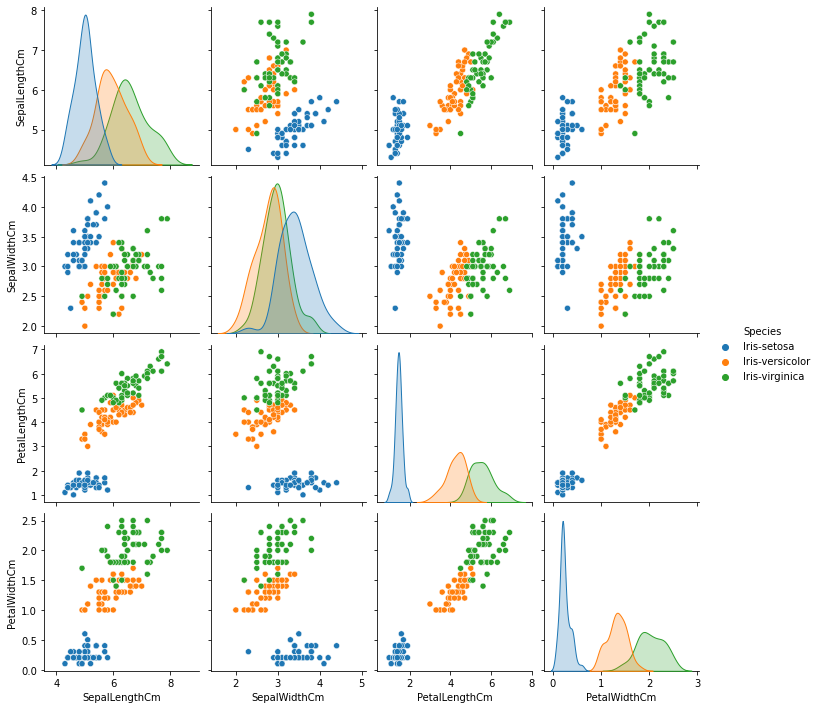

In [104]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [105]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [106]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

In [107]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [108]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [109]:
def neuro_train(neuron_numb = 5, epoch = 3000):
# присваевание случайных весов
    
    

    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = 0.1

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epoch):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    
    return w0, w1, layer1, layer2, accuracy, errors

In [110]:
def print_acc(w0, w1, layer1, layer2, accuracy, errors):
    
  
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Accuracy нейронной сети " + str(round(accuracy,2)) + "%")

Количество нейронов: 1


<ipython-input-102-efccc86776c5>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


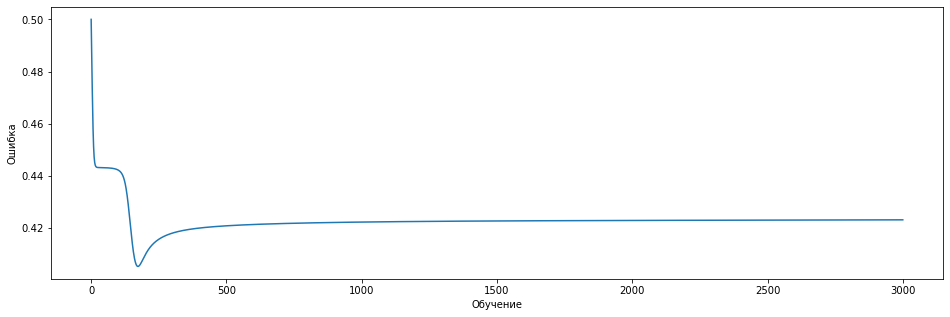

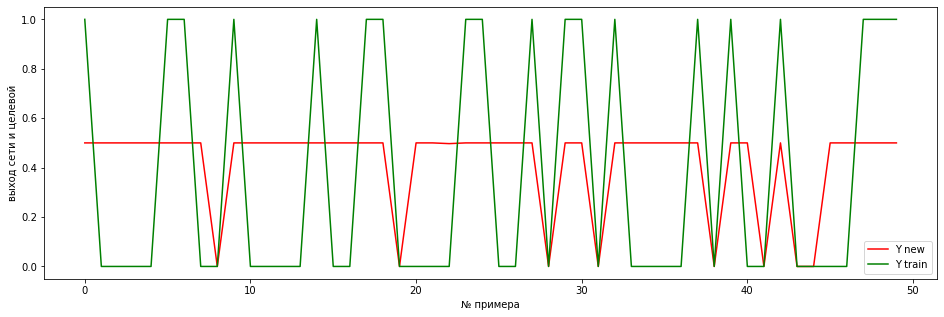

Accuracy нейронной сети 57.69%
Количество нейронов: 2


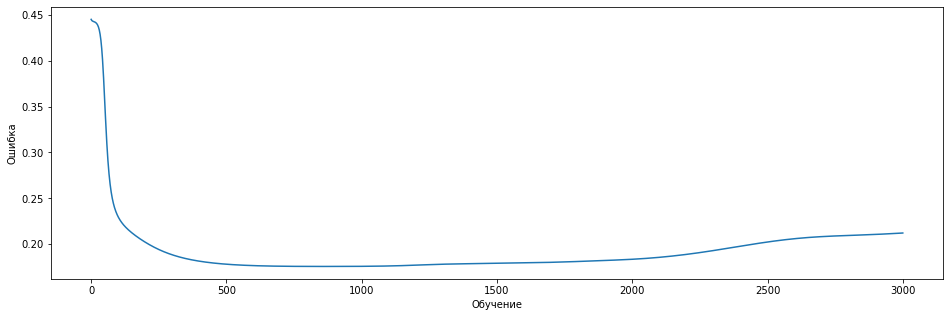

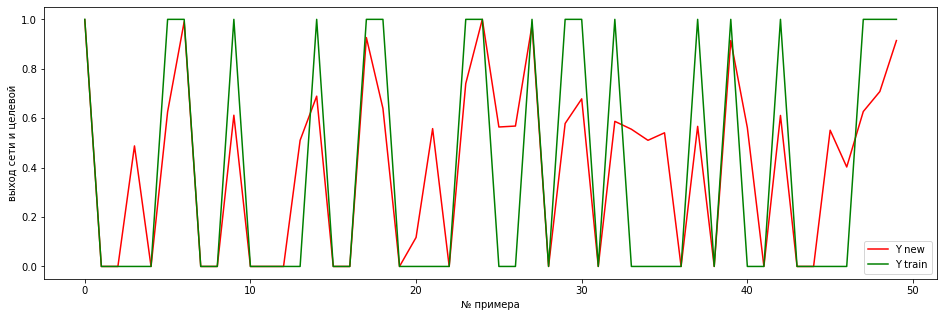

Accuracy нейронной сети 78.78%
Количество нейронов: 3


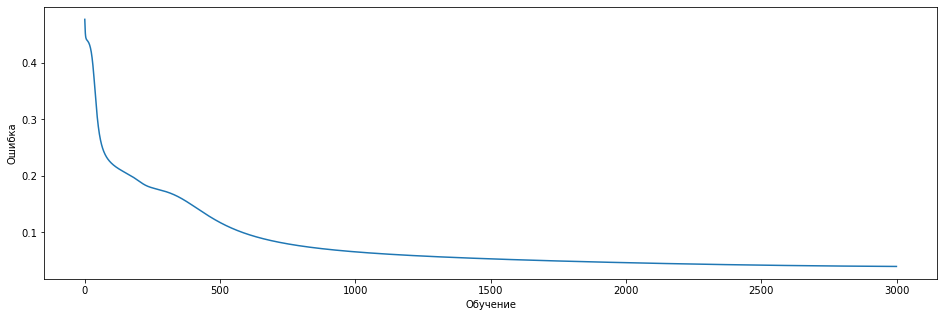

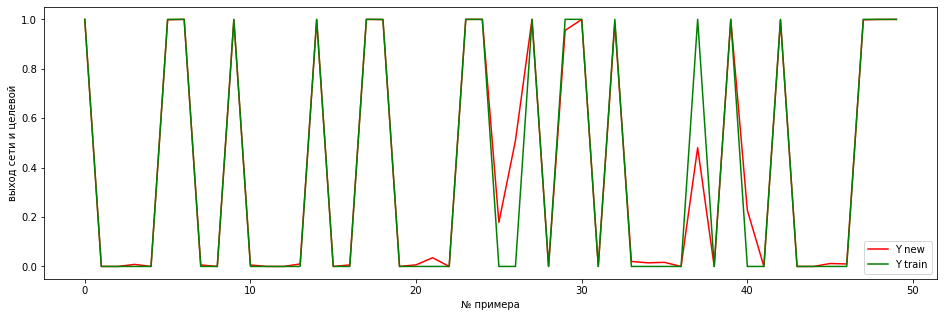

Accuracy нейронной сети 96.04%
Количество нейронов: 5


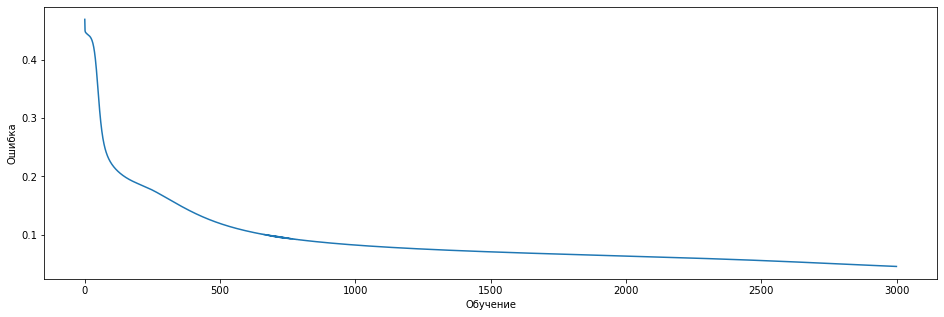

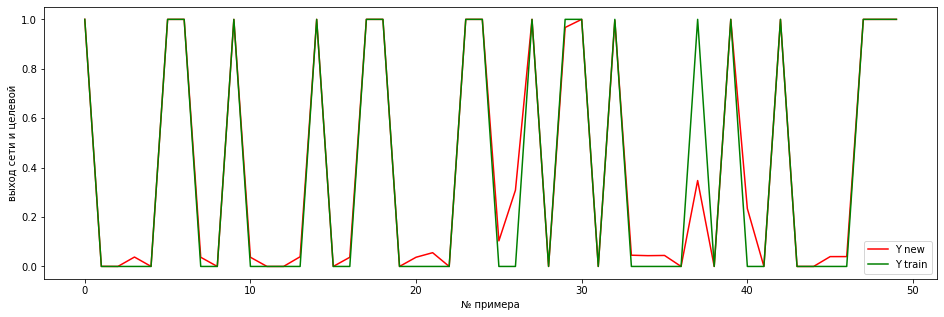

Accuracy нейронной сети 95.44%
Количество нейронов: 7


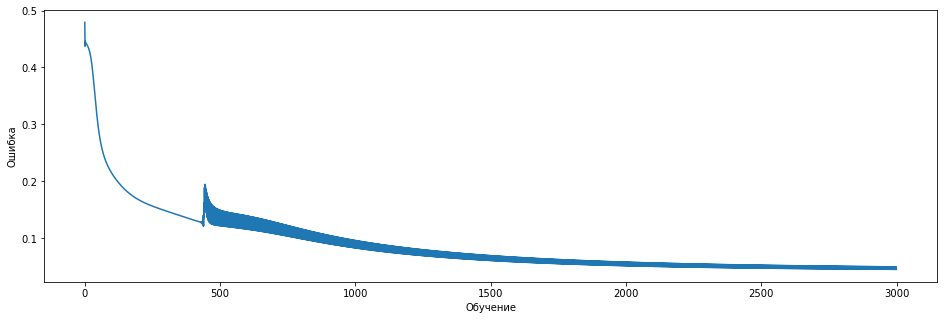

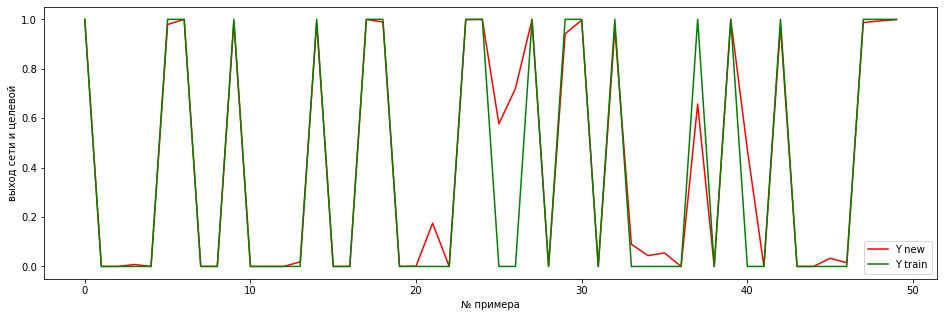

Accuracy нейронной сети 95.54%
Количество нейронов: 9


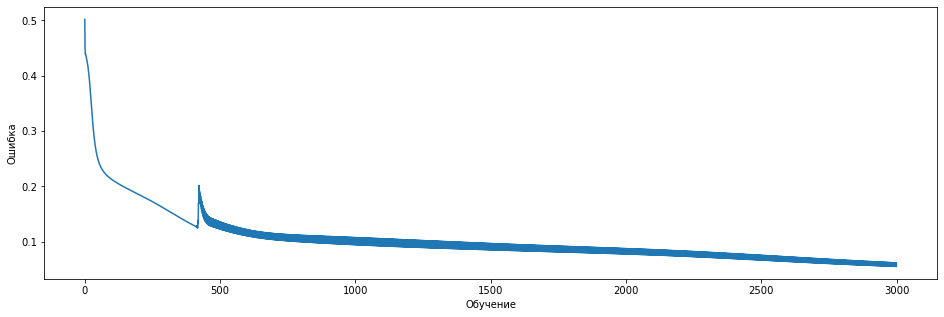

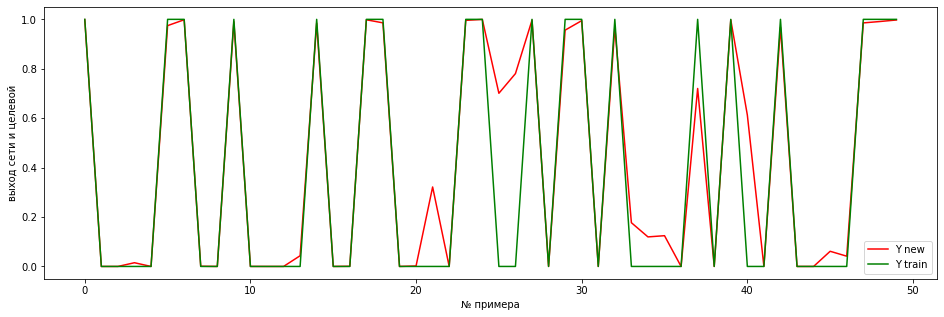

Accuracy нейронной сети 94.49%
Количество нейронов: 10


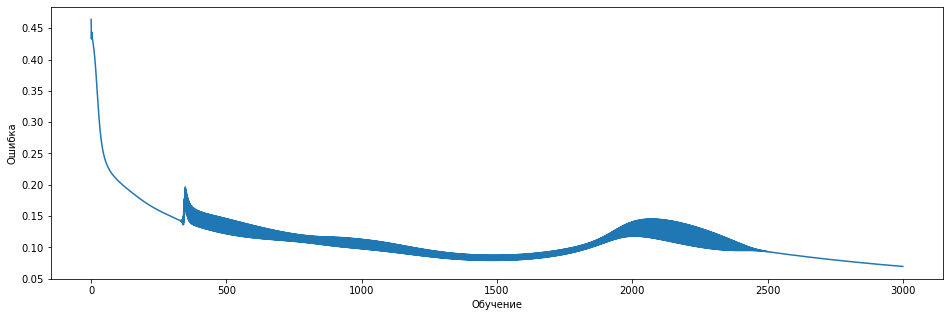

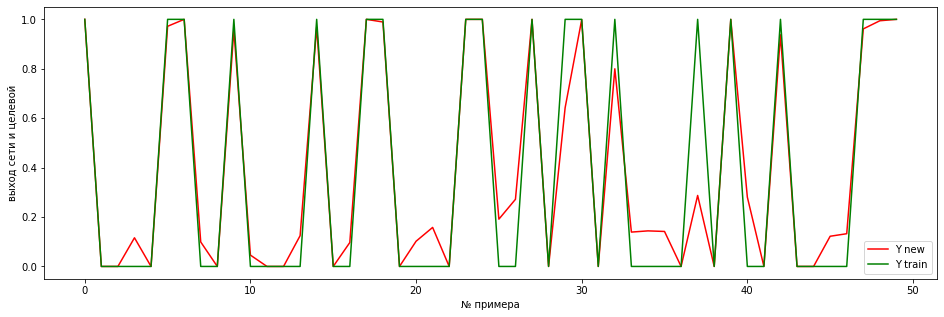

Accuracy нейронной сети 93.03%
Количество нейронов: 15


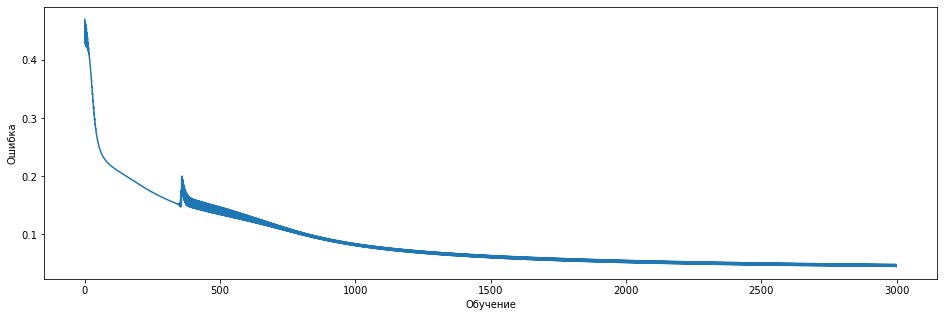

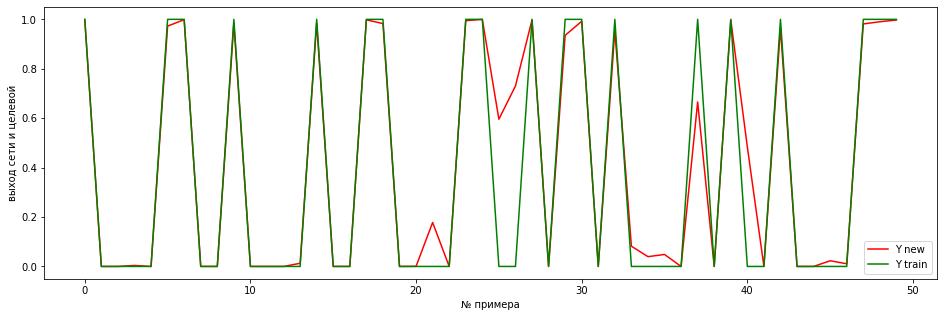

Accuracy нейронной сети 95.51%


In [111]:
neuron_numbs = [1, 2, 3, 5, 7, 9, 10, 15]

for neuron_numb in neuron_numbs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(neuron_numb, 3000)
    print('Количество нейронов: '+ str(neuron_numb))
    print_acc(w0, w1, layer1, layer2, accuracy, errors)

In [112]:
# прямое распространение(feed forward)
def print_acc_test(w0, w1, layer1, layer2, accuracy, errors):
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t


    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
    plt.plot(y_test[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть

    # метрика модели
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    print("Accuracy нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Количество нейронов: 1


<ipython-input-102-efccc86776c5>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


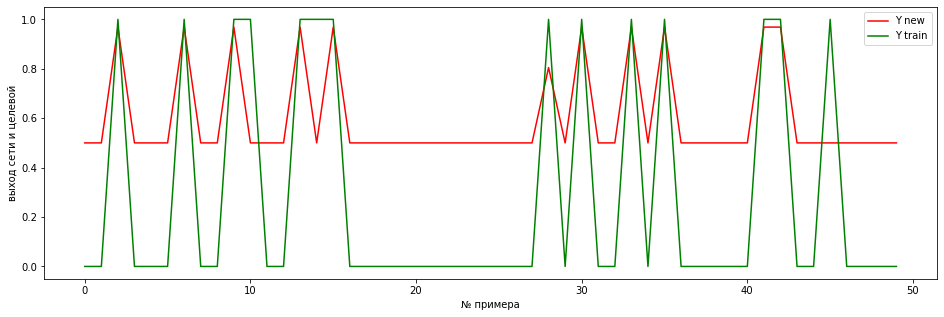

Accuracy нейронной сети на тесте 60.31%
Количество нейронов: 2


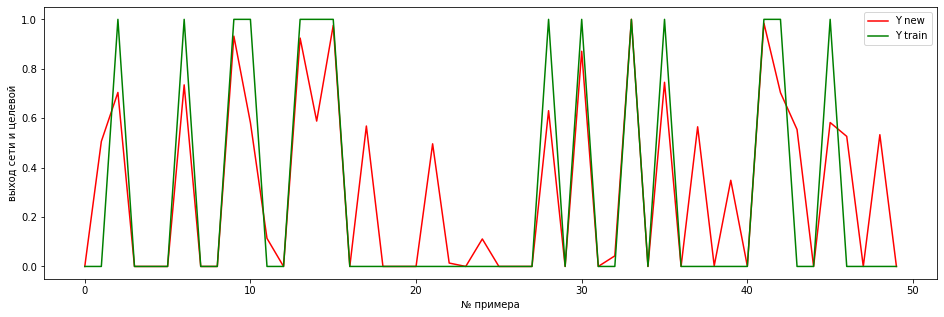

Accuracy нейронной сети на тесте 78.16%
Количество нейронов: 3


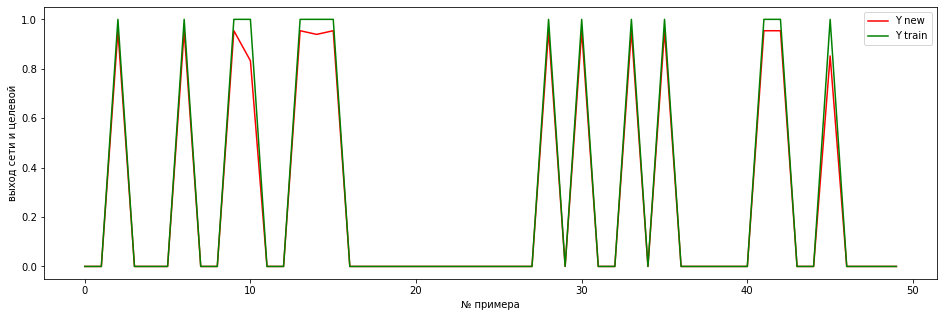

Accuracy нейронной сети на тесте 96.49%
Количество нейронов: 5


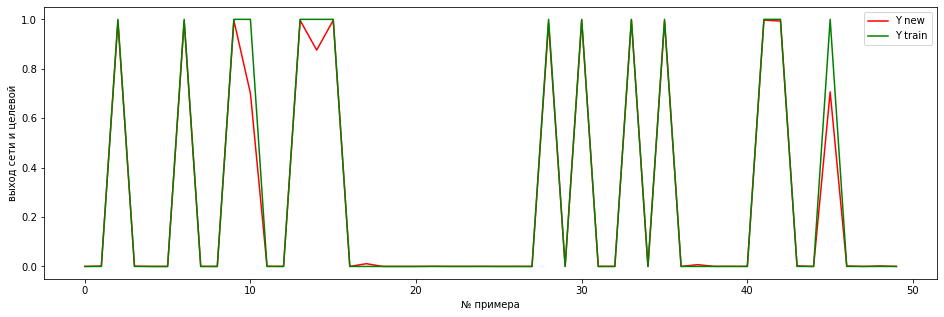

Accuracy нейронной сети на тесте 97.42%
Количество нейронов: 7


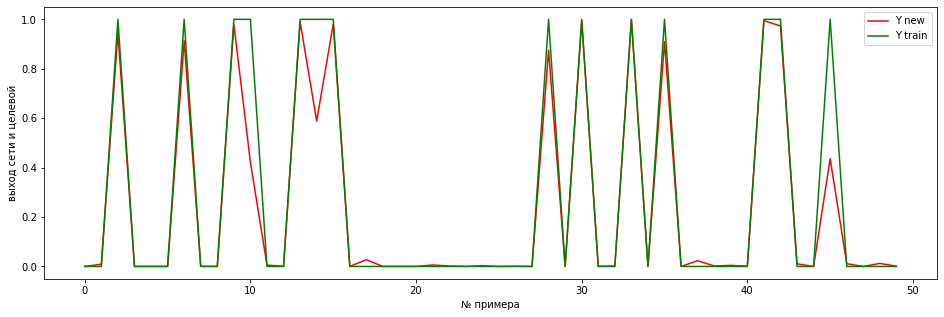

Accuracy нейронной сети на тесте 95.03%
Количество нейронов: 9


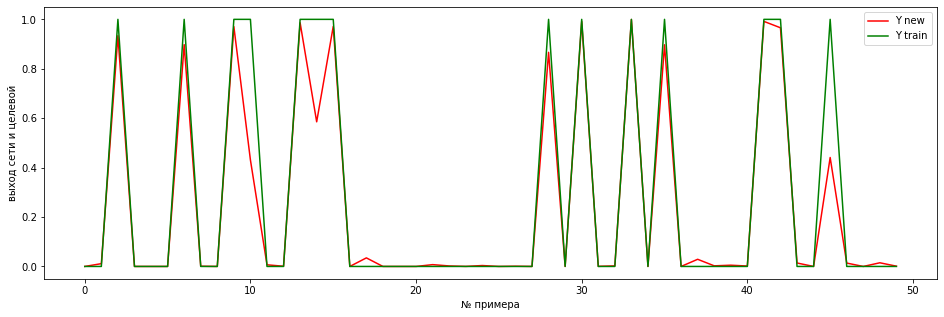

Accuracy нейронной сети на тесте 94.18%
Количество нейронов: 10


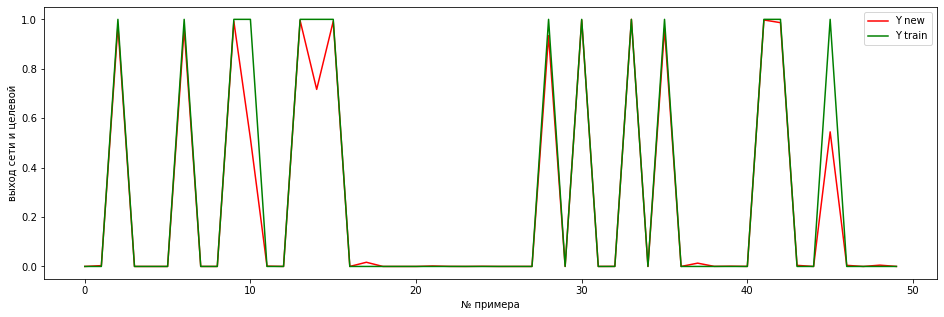

Accuracy нейронной сети на тесте 97.23%
Количество нейронов: 15


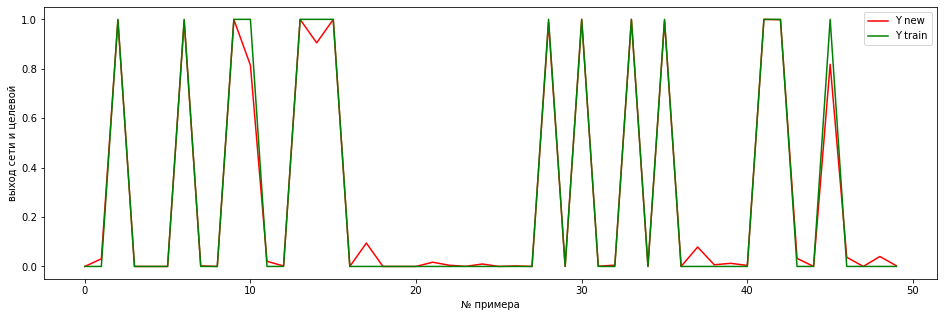

Accuracy нейронной сети на тесте 98.33%


In [113]:
for neuron_numb in neuron_numbs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(neuron_numb, 3000)
    print('Количество нейронов: '+ str(neuron_numb))
    print_acc_test(w0, w1, layer1, layer2, accuracy, errors)

Количество эпох: 100


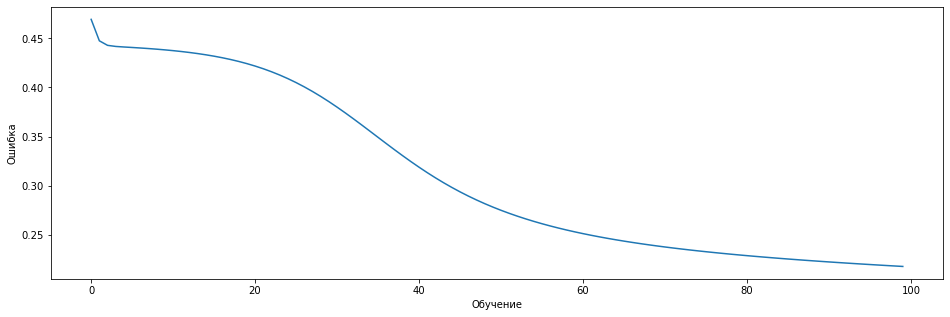

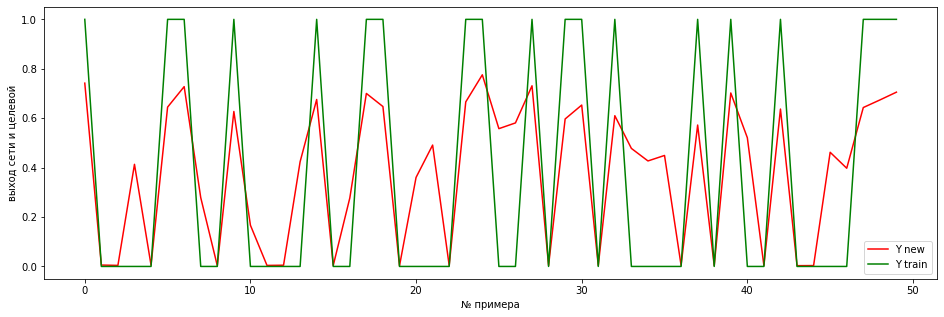

Accuracy нейронной сети 78.23%
Количество эпох: 300


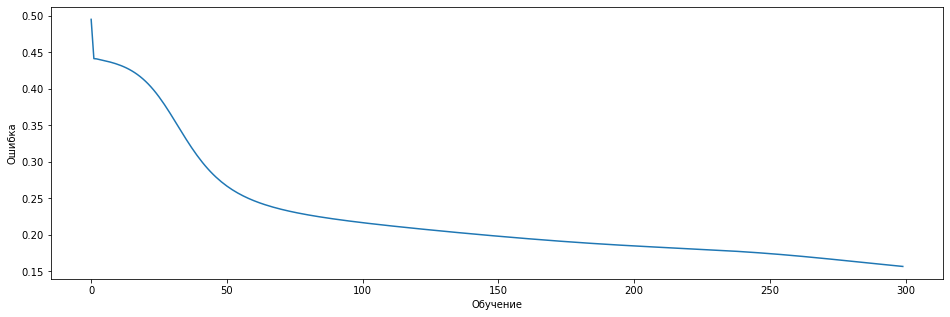

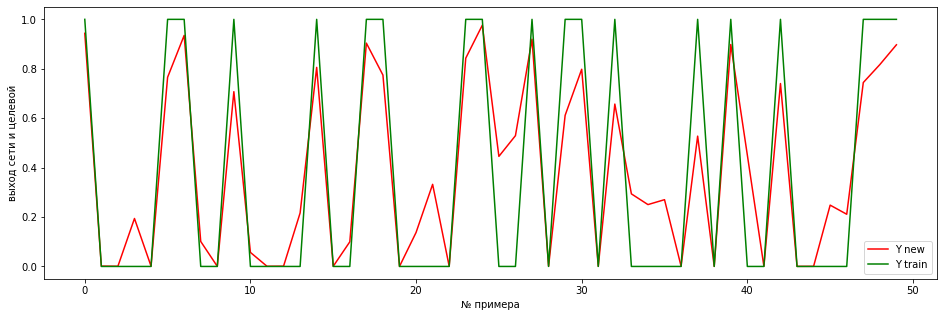

Accuracy нейронной сети 84.33%
Количество эпох: 1000


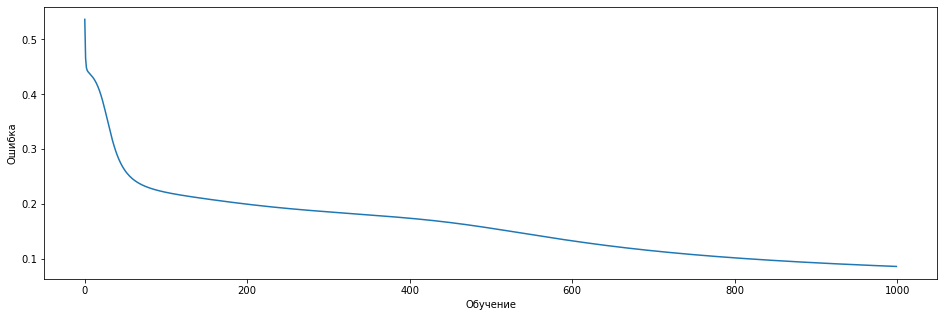

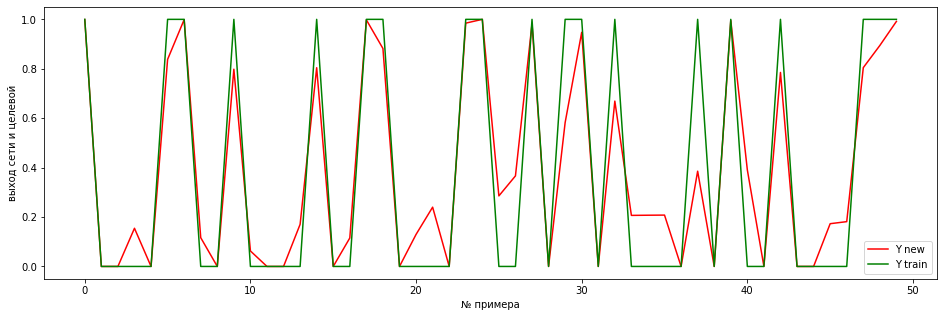

Accuracy нейронной сети 91.36%
Количество эпох: 3000


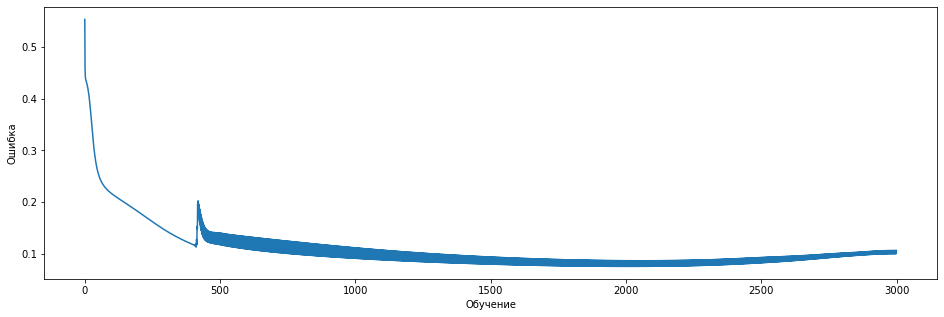

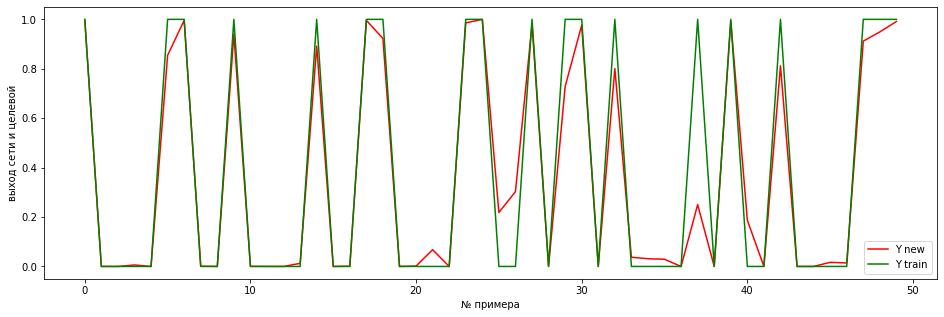

Accuracy нейронной сети 89.34%
Количество эпох: 5000


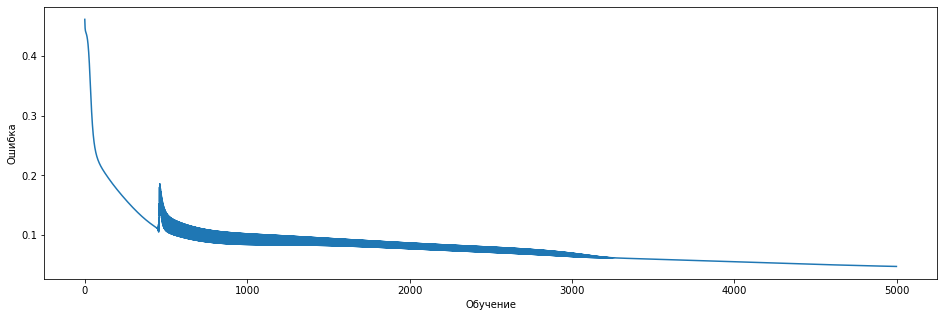

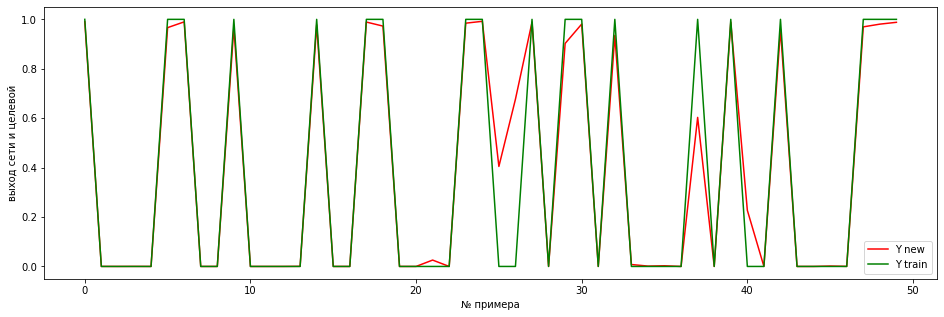

Accuracy нейронной сети 95.24%


In [114]:
epochs = [100, 300, 1000, 3000, 5000]
for epoch in epochs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(5, epoch)
    print('Количество эпох: '+ str(epoch))
    print_acc(w0, w1, layer1, layer2, accuracy, errors)

Количество эпох: 100


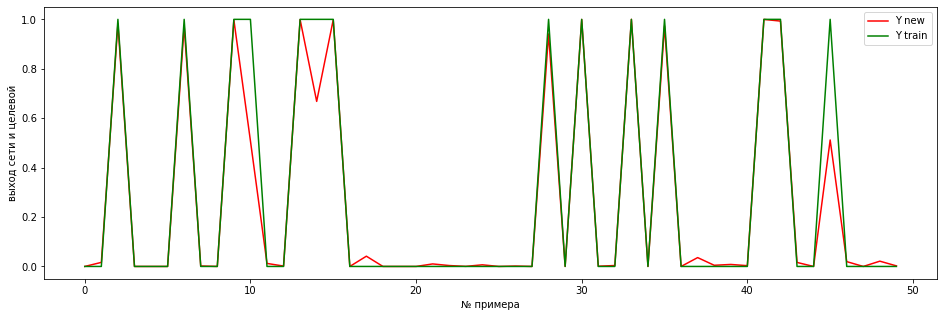

Accuracy нейронной сети на тесте 97.43%
Количество эпох: 300


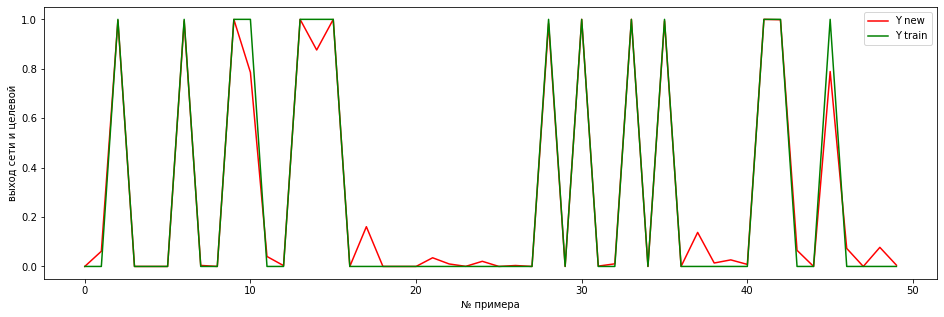

Accuracy нейронной сети на тесте 97.56%
Количество эпох: 1000


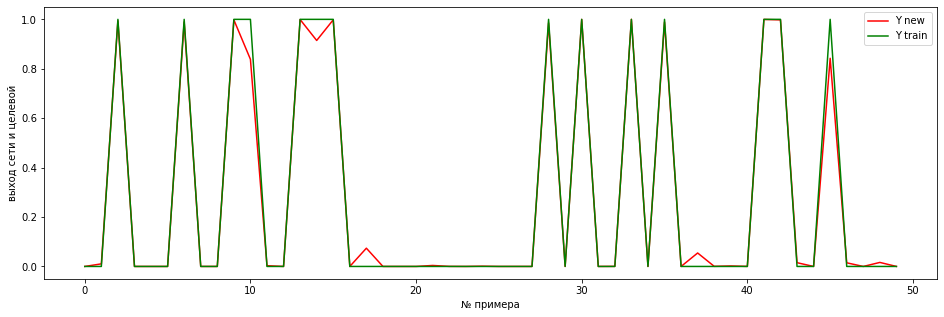

Accuracy нейронной сети на тесте 98.2%
Количество эпох: 3000


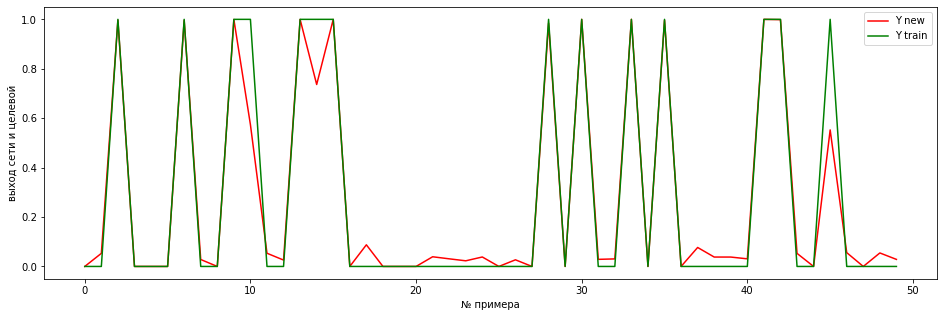

Accuracy нейронной сети на тесте 96.82%
Количество эпох: 5000


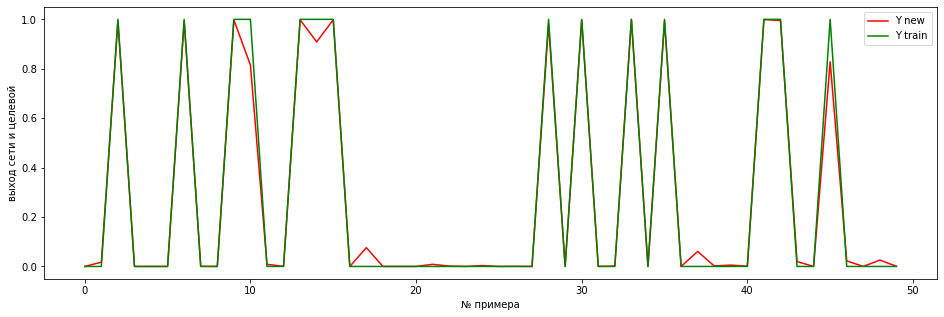

Accuracy нейронной сети на тесте 98.71%


In [115]:
for epoch in epochs:
    w0, w1, layer1, layer2, accuracy, errors = neuro_train(neuron_numb, 3000)
    print('Количество эпох: '+ str(epoch))
    print_acc_test(w0, w1, layer1, layer2, accuracy, errors)

Увеличение нейронов после 9 приводит к ухудшению точности. Увеличение количества эпох приводит к улучшению точности на трейне. Но что увеличение нейронов, что увеличение эпох приводит к переобучению, что ухудшает показатели на тесте.